Hw3 - Q5

In [1]:
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot

Inputting Data

In [3]:
f = 30 # in mm

print('Approximate External Orientation for each picture')
aprox_ext_rotation = np.loadtxt('data/approxEOP.txt')
aprox_ext_rotation_pd = pd.DataFrame(aprox_ext_rotation,columns=['X','Y','Z','omega','phi','kappa'])
print(aprox_ext_rotation_pd)

print('\nGround Control Points')
gcp_pd = pd.read_csv('data/controlPoints.txt', sep='\t')
gcp = gcp_pd.to_numpy()
gcp[:,0] = (gcp[:,0]).astype(int)
# np.put(gcp,(gcp.shape[0],0),np.int_(gcp[:,0]))
print(gcp_pd)
# print(gcp)
# print((np.int_(gcp[:,0])).dtype)
# print(gcp_pd.dtypes)
# print(gcp.dtype)

print('\nCamera points of GCP')
camera_control_points_pd = pd.read_csv('data/controlPointsSamples.txt', sep=' |\t', engine='python')
camera_control_points = camera_control_points_pd.to_numpy()
camera_control_points[:,0:1] = camera_control_points[:,0:1].astype(int)
print(camera_control_points_pd)

print('\nCamera Tie Points')
tie_points_pd = pd.read_csv('data/tiePointsSamples.txt', sep=' |\t', engine='python')
tie_points = tie_points_pd.to_numpy()
print(tie_points_pd)

Approximate External Orientation for each picture
        X       Y       Z  omega  phi  kappa
0  20.652  21.344  50.349    0.0  0.0    0.0
1  36.111  21.448  52.378    0.0  0.0    0.0
2  44.346  20.245  48.475    0.0  0.0    0.0
3  20.255  38.253  49.896    0.0  0.0    0.0
4  35.835  35.765  51.272    0.0  0.0    0.0
5  45.240  39.902  49.479    0.0  0.0    0.0
6  23.037  55.531  49.818    0.0  0.0    0.0
7  35.072  54.896  48.637    0.0  0.0    0.0
8  47.649  56.771  49.733    0.0  0.0    0.0

Ground Control Points
   pnt       x       y  z
0    1   6.218   2.974  0
1    2  32.881   8.660  0
2    3  38.940  35.843  0
3    4   8.520  35.679  0
4    5  52.902  49.538  0

Camera points of GCP
    img  pnt       x       y
0     1    1  -8.968 -10.917
1     1    2   7.020  -7.509
2     1    3  10.659   8.809
3     1    4  -7.593   8.702
4     2    1 -16.269 -11.410
5     2    2  -0.375  -7.514
6     2    3   2.780   8.896
7     2    4 -15.462   8.252
8     3    2  -9.262  -6.166
9     3  

A) Calculating (X,Y,Z) by using approximate orientation

In [4]:
from XYZintersect import intersecXYZ
tie_XYZ = intersecXYZ(tie_points,aprox_ext_rotation)
tie_XYZ_pd = pd.DataFrame(tie_XYZ,columns=['X','Y','Z'])
tie_XYZ_pd.to_html('tie_XYZ.html')
print(tie_XYZ_pd)


            X          Y          Z
0   21.984102  20.744780   0.186616
1   21.618848  31.465623  -0.357840
2   20.659463   8.168322 -10.044325
3   34.434315  21.598547   1.705736
4   34.615496  31.904715   0.664005
5   33.317545  12.208778   5.960271
6   46.526024  21.695850   5.373289
7   45.227310  31.143520   4.824370
8   44.331752  15.488080  24.389293
9   22.284937  37.900945  -0.295871
10  23.065638  48.266761  -3.328404
11  20.556595  27.188812  -0.057745
12  34.644621  38.721159  -0.315769
13  33.865970  49.231240  -0.312620
14  34.741550  27.743254   1.024329
15  47.496430  38.456856  -0.106234
16  48.121370  49.092702   1.479397
17  45.508662  27.469637   4.917393
18  21.484973  54.953944  -3.015373
19  23.118258  64.102487   4.562032
20  21.709378  43.761403  -3.315035
21  34.021244  55.608984  -0.321877
22  36.164064  66.741427  -0.740855
23  33.385305  45.041262  -0.234785
24  46.727537  55.167539   2.013286
25  47.698848  69.042524 -10.204255
26  47.862431  45.105552   1

A-1-1) Drawing the System

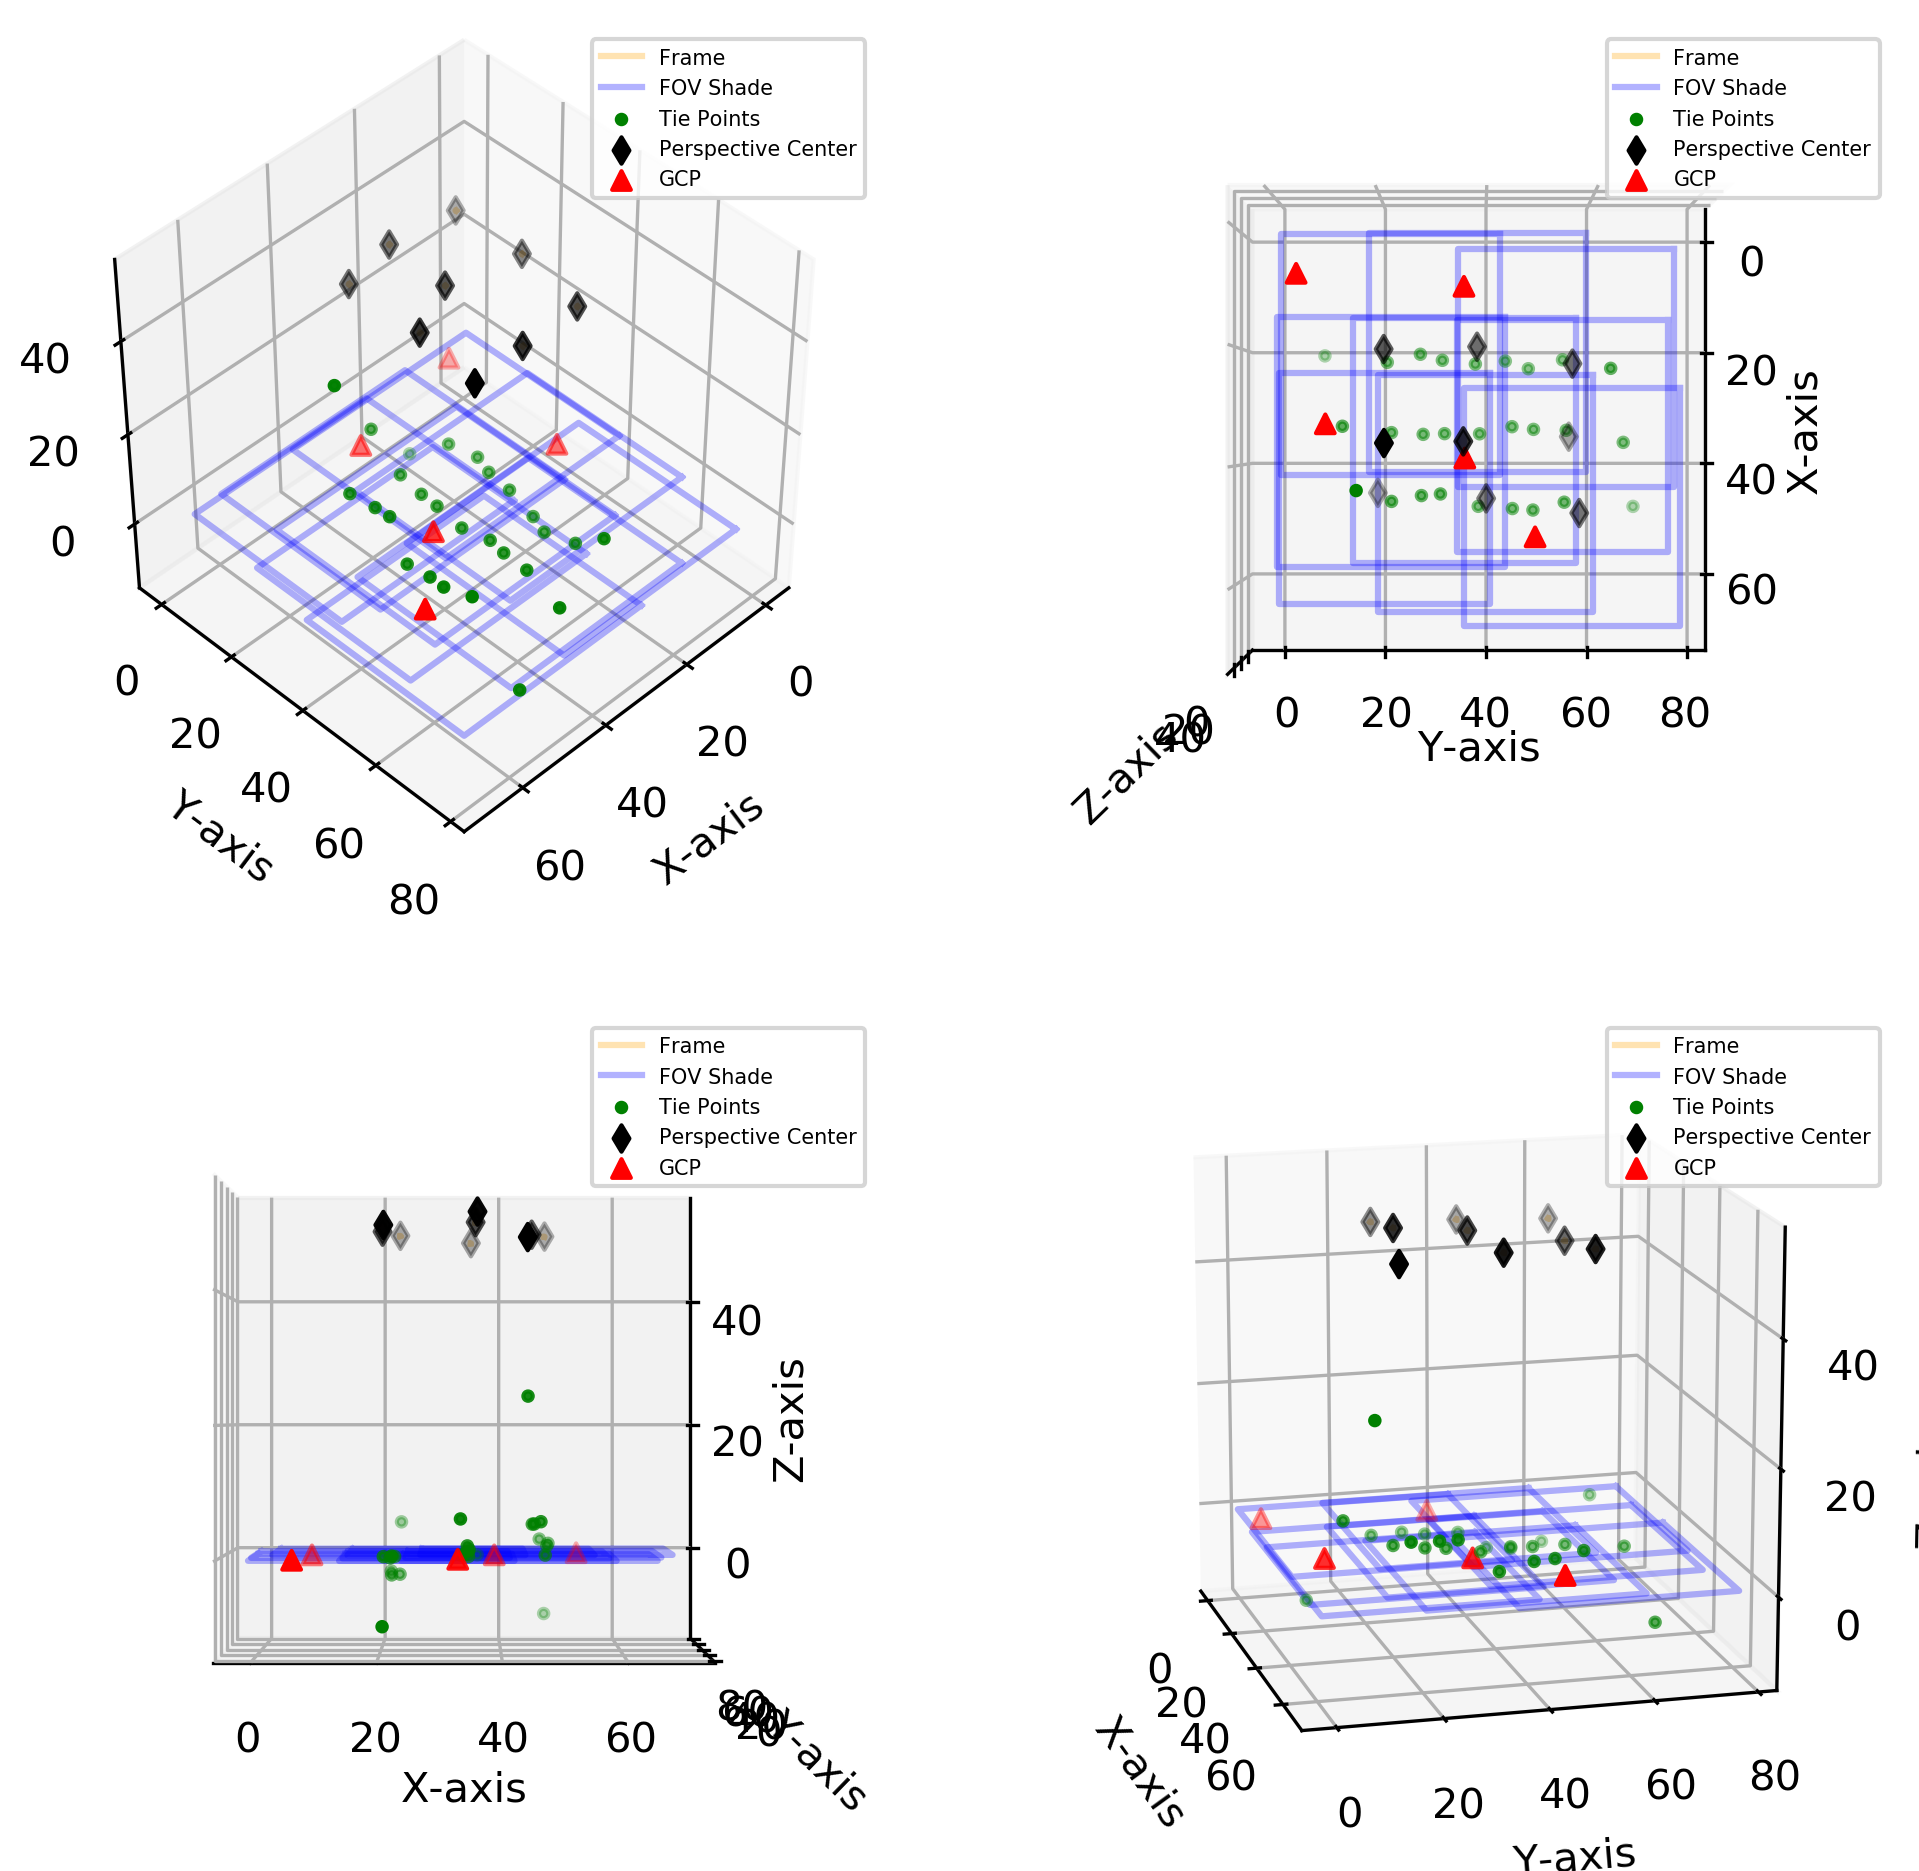

In [5]:
# Creating Frame Corners, order(lu,ru,rb,lb,lu)
imgs_limit_ground = np.zeros((9,3*5))
imgs_limit_camera = np.zeros((9,3*5))
dl_mm = 25.4/2
dl_m = (25.4/2)*0.001
# Creating real camera frames
for i,img in enumerate(aprox_ext_rotation):
    imgs_limit_camera[i,0:3] = imgs_limit_camera[i,12:15] = [img[0]-dl_m,img[1]+dl_m,img[2]-f*0.001]
    imgs_limit_camera[i,3:6] = [img[0]+dl_m,img[1]+dl_m,img[2]-f*0.001]
    imgs_limit_camera[i,6:9] = [img[0]+dl_m,img[1]-dl_m,img[2]-f*0.001]
    imgs_limit_camera[i,9:12] = [img[0]-dl_m,img[1]-dl_m,img[2]-f*0.001]
# Creating FOV on ground Z=0
for i,img in enumerate(aprox_ext_rotation):
    scale = img[2]/(f*0.001)
    imgs_limit_ground[i,0:3] = imgs_limit_ground[i,12:15] = [img[0]-scale*dl_m,img[1]+scale*dl_m,0]
    imgs_limit_ground[i,3:6] = [img[0]+scale*dl_m,img[1]+scale*dl_m,0]
    imgs_limit_ground[i,6:9] = [img[0]+scale*dl_m,img[1]-scale*dl_m,0]
    imgs_limit_ground[i,9:12] = [img[0]-scale*dl_m,img[1]-scale*dl_m,0]


from mpl_toolkits.mplot3d import axes3d

def pltoOne(tie_XYZ,gcp,aprox_ext_rotation,imgs_limit_camera,imgs_limit_ground,ax,phi,lam):
    ax.scatter(tie_XYZ[:,0], tie_XYZ[:,1], tie_XYZ[:,2], color='green', marker=".", label="Tie Points")
    ax.scatter(aprox_ext_rotation[:,0], aprox_ext_rotation[:,1], aprox_ext_rotation[:,2], color='black', marker="d",\
               label="Perspective Center")
    ax.scatter(gcp[:,1], gcp[:,2], gcp[:,3], color='red', marker="^", label="GCP")
    # Plotting real camera frames
    for i in range(imgs_limit_camera.shape[0]):
        temp = (imgs_limit_camera[i,:]).reshape(5,3)
        ax.plot(temp[:,0], temp[:,1], temp[:,2], alpha=0.3, color='orange', label="Frame" if i == 0 else "")
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.view_init(phi,lam)
    # Plotting FOV on ground Z=0
    for i in range(imgs_limit_ground.shape[0]):
        temp = (imgs_limit_ground[i,:]).reshape(5,3)
        ax.plot(temp[:,0], temp[:,1], temp[:,2], color='blue', alpha=0.3, label="FOV Shade" if i == 0 else "")
    ax.legend()
    ax.legend(prop={'size': 5})

fig = pyplot.figure(figsize=(8,8), dpi=300)
ax00 = fig.add_subplot(2,2,1, projection='3d')
ax01 = fig.add_subplot(2,2,2, projection='3d')
ax10 = fig.add_subplot(2,2,3, projection='3d')
ax11 = fig.add_subplot(2,2,4, projection='3d')
pltoOne(tie_XYZ,gcp,aprox_ext_rotation,imgs_limit_camera,imgs_limit_ground,ax00,45,45)
pltoOne(tie_XYZ,gcp,aprox_ext_rotation,imgs_limit_camera,imgs_limit_ground,ax01,90,0)
pltoOne(tie_XYZ,gcp,aprox_ext_rotation,imgs_limit_camera,imgs_limit_ground,ax10,0,-90)
pltoOne(tie_XYZ,gcp,aprox_ext_rotation,imgs_limit_camera,imgs_limit_ground,ax11,15,-15)
pyplot.savefig('3dRepresentation.png', dpi=300)
pyplot.show()


A-3) Creating A matrix

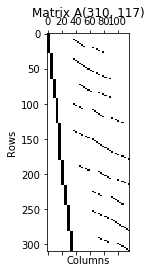

In [33]:
from mat import ComputeDesignMatrix as cm

# test1 = cm(gcp[:,1:],*aprox_ext_rotation[0,0:3],0,0,0,30)
# print(pd.DataFrame(test1))

number_of_gcp = int(np.max(gcp[:,0]))
number_of_tie = int(np.max(tie_points[:,1]))
number_of_imgs = aprox_ext_rotation.shape[0]
to_m = 0.001
columns = 4*number_of_imgs+3*number_of_tie
A = np.zeros((0,columns))
L = np.zeros((0,1))
def calcA(A,L,gcp,camera_control_points,tie_points,tie_XYZ,aprox_ext_rotation,number_of_imgs,number_of_tie):
    A = np.zeros((0,columns))
    L = np.zeros((0,1))
    block_counter = 0
    for i in range(1,number_of_imgs+1,1):
        for row in range(camera_control_points.shape[0]-1):
            if int(camera_control_points[row,0]) == i:
                tempA = cm(gcp[int(camera_control_points[row,1])-1,1:].reshape(1,3),\
                           *aprox_ext_rotation[int(camera_control_points[row,0])-1,:],30)
                temp = np.zeros((2,columns))
                temp[0,block_counter:block_counter+4] = tempA[0,:]
                temp[1,block_counter:block_counter+4] = tempA[1,:]
                A = np.vstack((A,temp))
                dx = gcp[int(camera_control_points[row,1])-1,1]-aprox_ext_rotation[int(camera_control_points[row,0])-1,0]
                dy = gcp[int(camera_control_points[row,1])-1,2]-aprox_ext_rotation[int(camera_control_points[row,0])-1,1]
                base = gcp[int(camera_control_points[row,1])-1,3]-aprox_ext_rotation[int(camera_control_points[row,0])-1,2]
                k = aprox_ext_rotation[int(camera_control_points[row,0])-1,5]
                l1 = -f*((np.cos(k)*dx-np.sin(k)*dy)/base)
                l2 = -f*((np.sin(k)*dx+np.cos(k)*dy)/base)
                L0 = np.vstack((l1,l2))
                Lb = np.vstack((camera_control_points[row,2],camera_control_points[row,3]))
                La = Lb - L0
                L = np.vstack((L,La))
        for row in range(tie_points.shape[0]):
            if int(tie_points[row,0]) == i:
                tempTie = (tie_XYZ[int(tie_points[row,1])-1,:]).reshape(1,3)
                tempA = cm(tempTie,\
                           *aprox_ext_rotation[int(tie_points[row,0])-1,:],30)
                temp = np.zeros((2,columns))
                temp[0,block_counter:block_counter+4] = tempA[0,:]
                temp[1,block_counter:block_counter+4] = tempA[1,:]
                #Tie part
                t_index = 33+int(tie_points[row,1])*3
                temp[0,t_index:t_index+3] = tempA[0,0:3]
                temp[1,t_index:t_index+3] = tempA[1,0:3]
                A = np.vstack((A,temp))
                dx = tie_XYZ[int(tie_points[row,1])-1,0]-aprox_ext_rotation[int(tie_points[row,0])-1,0]
                dy = tie_XYZ[int(tie_points[row,1])-1,1]-aprox_ext_rotation[int(tie_points[row,0])-1,1]
                base = tie_XYZ[int(tie_points[row,1])-1,2]-aprox_ext_rotation[int(tie_points[row,0])-1,2]
                k = aprox_ext_rotation[int(tie_points[row,0])-1,5]
                l1 = -f*((np.cos(k)*dx-np.sin(k)*dy)/base)
                l2 = -f*((np.sin(k)*dx+np.cos(k)*dy)/base)
                L0 = np.vstack((l1,l2))
                Lb = np.vstack((tie_points[row,2],tie_points[row,3]))
                La = Lb - L0
                # print('Lb:'+str(Lb)+' L0:'+str(L0)+'\n')
                L = np.vstack((L,La))
        block_counter += 4
    return A,L
A,L = calcA(A,L,gcp,camera_control_points,tie_points,tie_XYZ,aprox_ext_rotation,number_of_imgs,number_of_tie)
fig2 = pyplot.spy(A)
pyplot.title('Matrix A'+str(A.shape))
pyplot.xlabel('Columns')
pyplot.ylabel('Rows')
fig2.autoscale()
pyplot.savefig('Amat.png', dpi=600)
# from sympy import *
# x = Symbol('x')
# a = Symbol('a')
# y = x*a
# yprime = y.diff(x)
# print(yprime)

B) Calculating N

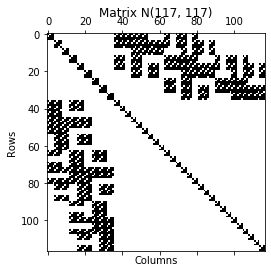

In [7]:
N = np.dot(A.T,A)
fig3 = pyplot.spy(N)
pyplot.title('Matrix N'+str(N.shape))
pyplot.xlabel('Columns')
pyplot.ylabel('Rows')
fig3.autoscale()
pyplot.savefig('Nmat.png', dpi=600)

C) Measuring time to Calculate Inverse Matrix N

In [8]:
import datetime
start = datetime.datetime.now()
N_inv = np.linalg.inv(N)
end = datetime.datetime.now()
delta_t = end-start
print(np.round(delta_t.microseconds*0.0000001,4),'Seconds To calculate normal inverse')

0.0222 Seconds To calculate normal inverse


D) Measuring time to Calculate Inverse Matrix N with Schur Compliment
$$\text{s}=\text{N}_{11}-\text{N}_{12}\text{N}_{22}^{-1}\text{N}_{12}^{\text{T}}$$

In [9]:
N11 = N[:36,:36]
N22 = N[36:,36:]
N12 = N[:36,36:]
N21 = N[36:,:36]

start = datetime.datetime.now()
N22_inv = np.linalg.inv(N22)
end = datetime.datetime.now()
delta_t = end-start
print(np.round((delta_t/100).microseconds*0.0000001,4),'Seconds To Calculate inv(N22)')

s = N11-np.dot(np.dot(N12,N22_inv),N21)

start2 = datetime.datetime.now()
s_inv = np.linalg.inv(s)
end2 = datetime.datetime.now()
delta_t2 = end2-start2

print(np.round(delta_t2.microseconds*0.0000001,4),'Seconds to Calculate s Part for solution')

0.0001 Seconds To Calculate inv(N22)
0.0001 Seconds to Calculate s Part for solution


E) Calculatin residuals for Oriantation with Schur Comliment
$$\text{X}_{\text{o}}=\text{s}^{-1}\left( \text{U}_1-\text{N}_{12}\text{N}_{22}^{-1}\text{U}_2 \right) $$

In [65]:
print('Calculating Orientation with Shur')
aprox_ext_rotation = np.loadtxt('data/approxEOP.txt')
Xo = np.hstack((aprox_ext_rotation[:,0:3],aprox_ext_rotation[:,5].reshape(9,1))).reshape(36,1)
dx_Xo = 1
counter = 0
ans_orient = (np.zeros((36,1))).reshape(36,1)
while np.max(np.abs(dx_Xo)) > 0.001 and counter < 8:
    A,L = calcA(A,L,gcp,camera_control_points,tie_points,tie_XYZ,aprox_ext_rotation,number_of_imgs,number_of_tie)
    N = np.dot(A.T,A)
    N11 = N[:36,:36]
    N22 = N[36:,36:]
    N12 = N[:36,36:]
    N21 = N[36:,:36]
    N22_inv = np.linalg.inv(N22)
    s = N11-np.dot(np.dot(N12,N22_inv),N21)
    s_inv = np.linalg.inv(s)
    U = np.dot(A.T,L)
    U2 = (U[36:,0]).reshape((U[36:,0]).shape[0],1)
    U1 = (U[:36,0]).reshape((U[:36,0]).shape[0],1)
    dx_Xo =  np.dot(s_inv,U1-np.dot(N12,np.dot(N22_inv,U2))).reshape(36,1)
    
    ans_orient = np.hstack((ans_orient,dx_Xo.reshape(36,1)))
    Xo += dx_Xo
    Xo_temp = Xo.reshape(9,4)
    aprox_ext_rotation[:,0:3] = Xo_temp[:,0:3]
    aprox_ext_rotation[:,5] = Xo_temp[:,3]
    counter+=1
(pd.DataFrame(ans_orient)).to_excel('Shurs ssingular.xlsx')


Calculating Orientation with Shur


In [74]:
print('Calculating Orientation without! Shur')
aprox_ext_rotation = np.loadtxt('data/approxEOP.txt')
Xo = np.hstack((aprox_ext_rotation[:,0:3],aprox_ext_rotation[:,5].reshape(9,1))).reshape(36,1)
dx_Xo = 1
counter = 0
while np.max(np.abs(dx_Xo)) > 0.01 and counter < 20:
    A,L = calcA(A,L,gcp,camera_control_points,tie_points,tie_XYZ,aprox_ext_rotation,number_of_imgs,number_of_tie)
    N = np.dot(A.T,A)
    # print(pd.DataFrame(N))
    N_inv = np.linalg.inv(N)
    U = np.dot(A.T,L)
    dx_X =  np.dot(N_inv,U)
    dx_Xo = dx_X[:36].reshape(36,1)
    # print(pd.DataFrame(dx_Xo[:5,0]))
    Xo += dx_Xo
    Xo_temp = Xo.reshape(9,4)
    aprox_ext_rotation[:,0:3] = Xo_temp[:,0:3]
    aprox_ext_rotation[:,5] = Xo_temp[:,3]
    counter+=1
print('Number of iterations:'+str(counter))
print(pd.DataFrame(dx_Xo))
(pd.DataFrame(dx_Xo)).to_excel('Orienation Residuals Without Shur.xlsx')
(pd.DataFrame(Xo_temp)).to_excel('Orienation Without Shur.xlsx')

Calculating Orientation without! Shur
Number of iterations:20
               0
0  -9.721390e-14
1  -3.149217e-14
2  -3.405545e-19
3   6.250538e-02
4  -3.004541e-15
5   3.608225e-15
6  -9.556828e-42
7   2.694037e-02
8  -1.065814e-14
9   4.884981e-15
10 -1.839053e-44
11 -4.188858e-02
12 -1.427747e-13
13  2.428613e-15
14  5.873223e-39
15 -6.094356e-02
16  1.998401e-14
17 -1.165734e-14
18 -5.789965e-32
19 -7.664664e-02
20 -5.301315e-15
21 -6.772360e-15
22  4.921875e-48
23 -2.979247e-02
24 -2.393641e-12
25  3.501366e-14
26 -1.917534e-33
27 -5.829232e-02
28  2.140510e-13
29  1.193490e-15
30 -2.320079e-33
31 -9.193918e-02
32 -6.750156e-14
33 -5.506706e-14
34 -3.724598e-35
35  7.333982e-02


In [96]:
print('Calculating Orientation and Tie_XYZ without! Shur')
aprox_ext_rotation = np.loadtxt('data/approxEOP.txt')
Xo = np.hstack((aprox_ext_rotation[:,0:3],aprox_ext_rotation[:,5].reshape(9,1))).reshape(36,1)
Xt = copy.deepcopy(tie_XYZ.reshape(81,1))
tie_XYZ2 = copy.deepcopy(tie_XYZ)
dx_Xo = 1
dx_Xt = 1
counter = 0
best_result = 100
while np.max(np.abs(dx_Xo)) > 0.001 and np.max(np.abs(dx_Xt)) > 0.00001 and counter < 10:
    A,L = calcA(A,L,gcp,camera_control_points,tie_points,tie_XYZ2,aprox_ext_rotation,number_of_imgs,number_of_tie)
    N = np.dot(A.T,A)
    # print(pd.DataFrame(N))
    N_inv = np.linalg.inv(N)
    U = np.dot(A.T,L)
    dx_X =  np.dot(N_inv,U)
    dx_Xo = dx_X[:36].reshape(36,1)
    dx_Xt = dx_X[36:].reshape(dx_X.shape[0]-36,1)
    # print(pd.DataFrame(dx_Xo[:5,0]))
    Xo += dx_Xo
    Xt += dx_Xt
    Xo_temp = Xo.reshape(9,4)
    Xt_temp = Xt.reshape(27,3)
    aprox_ext_rotation[:,0:3] = Xo_temp[:,0:3]
    aprox_ext_rotation[:,5] = Xo_temp[:,3]
    tie_XYZ2 = Xt_temp
    v = np.dot(A,dx_X)-L
    if best_result > np.linalg.norm(v):
        best_result = np.linalg.norm(v)
    else:
        break
    counter+=1
print('Number of iterations:'+str(counter))
print('Max Size dx_Xo:'+str(np.average(np.abs(dx_Xo))))
print('Max Size dx_Xt:'+str(np.average(np.abs(dx_Xt))))
print(pd.DataFrame(Xo_temp))
print(pd.DataFrame(Xt_temp))
(pd.DataFrame(dx_Xo)).to_excel('Orienation Residuals Without Shur.xlsx')
(pd.DataFrame(Xo_temp)).to_excel('Orienation Without Shur.xlsx')
(pd.DataFrame(dx_Xt)).to_excel('Tie XYZ Residuals Without Shur.xlsx')
(pd.DataFrame(Xt_temp)).to_excel('Tie XYZ Without Shur.xlsx')


Calculating Orientation and Tie_XYZ without! Shur
Number of iterations:1
Max Size dx_Xo:0.2813670588583567
Max Size dx_Xt:2.821081478815263
           0          1          2         3
0  21.163853  21.162894  49.969962 -0.001237
1  33.878246  21.256405  49.580140 -0.086898
2  46.657616  20.839651  48.619848  0.433291
3  21.170338  38.092957  48.696011 -0.336389
4  33.868657  38.106759  49.837428  0.111835
5  46.592594  38.119094  48.717899 -0.345906
6  21.165253  55.031805  49.926215 -0.082052
7  33.873864  55.052204  49.094570 -0.288614
8  46.577761  55.046453  49.391888  0.237075
            0          1          2
0   24.409951  19.475594   0.647698
1   22.949629  30.625518  -1.546592
2   18.741842  -1.168319 -48.789560
3   36.031942  22.825454   6.440940
4   35.864403  32.404391   2.467483
5   32.775789  16.067601  19.642450
6   46.508547  23.015464  18.896678
7   46.011446  29.899708  17.201529
8   40.185050  20.514202  50.425379
9   25.658028  37.341797  -1.421924
10  25.378109 

In [108]:
print('Calculating precition')
n = (tie_points.shape[0]+camera_control_points.shape[0])*2
u = number_of_imgs*4+number_of_tie*3
free = n-u
print('Degrees of freedom:'+str(free))
sig2post = np.dot(v.reshape(1,310),v.reshape(310,1))/free
error = np.diag(np.abs(sig2post)*(N_inv)**0.5)
Xo_error = error[0:36].reshape(9,4)
pd.DataFrame(Xo_error).to_excel('error of Xo.xlsx')
pd.DataFrame(error[36:].reshape(27,3)).to_excel('error of Xt.xlsx')

Calculating precition
Degrees of freedom:195


c:\users\pivsa\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
